In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

# Data Ingestion: 12 marks
## 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
## 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

# Data Preparation: 5 marks
## 1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

# Modelling: 26 marks
## 1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
## 2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
## 3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
## 4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

# Inference: 5 marks
## 1. Based on these predictions, what are the insights? (5 marks)


In [2]:
dic = pd.read_excel('Election_Data.xlsx', sheet_name='Sheet1')
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [3]:
dic

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [4]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


# 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

## Shape of the data set

In [6]:
print('Shape of the Data set:',df.shape)

Shape of the Data set: (1525, 10)


## Data type of data features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


## Missing values in dataset

In [8]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
df.isna().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**Data set has no null value or missing value. We can also infer that the column Unnamed:0 in insignificant so it can be dropped.**

In [10]:
cat = ['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [12]:
df.drop('Unnamed: 0',axis=1, inplace=True)

## Check for duplicates

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


**There are 8 duplicate entry in the dataset.So it is better to be removed.**

## Removing the Duplicates

In [14]:
df = pd.DataFrame.drop_duplicates(df)
print(df.duplicated().sum())

0


# 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

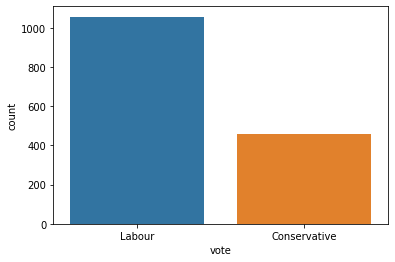

In [15]:
sns.countplot(df.vote)

**From this plot we can see that Labour party has more voters then conservative party.**

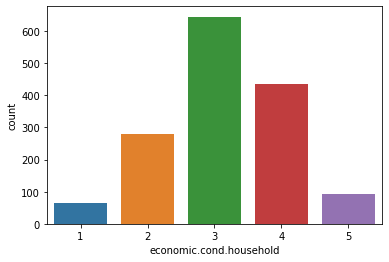

In [16]:
sns.countplot(df['economic.cond.household'])

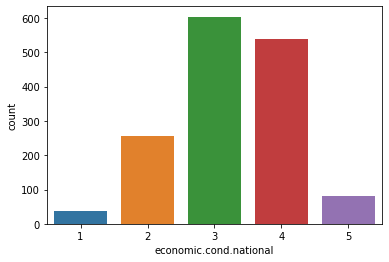

In [17]:
sns.countplot(df['economic.cond.national'])

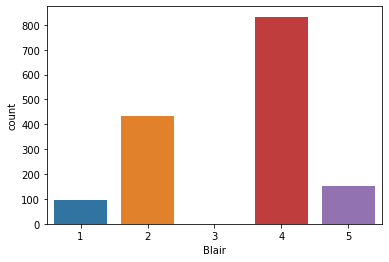

In [18]:
sns.countplot(df['Blair'])

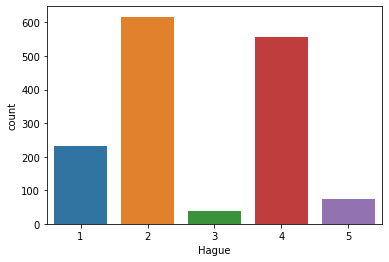

In [19]:
sns.countplot(df['Hague'])

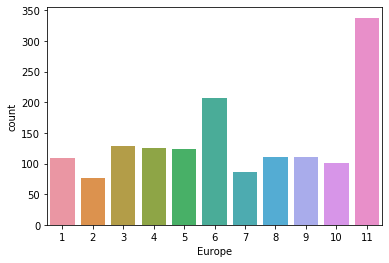

In [20]:
sns.countplot(df['Europe'])

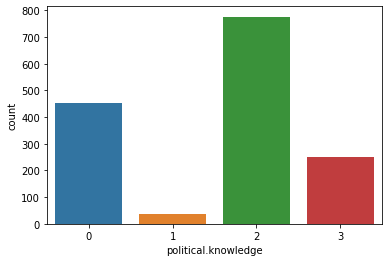

In [21]:
sns.countplot(df['political.knowledge'])

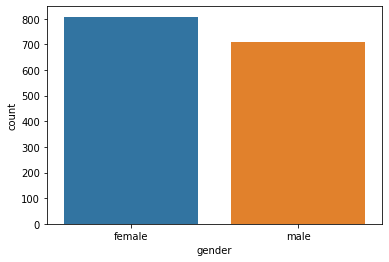

In [22]:
sns.countplot(df.gender)

**From this count plot we can visualize that there are more female voter then male voter in the polls.**

## Checking for Outliers

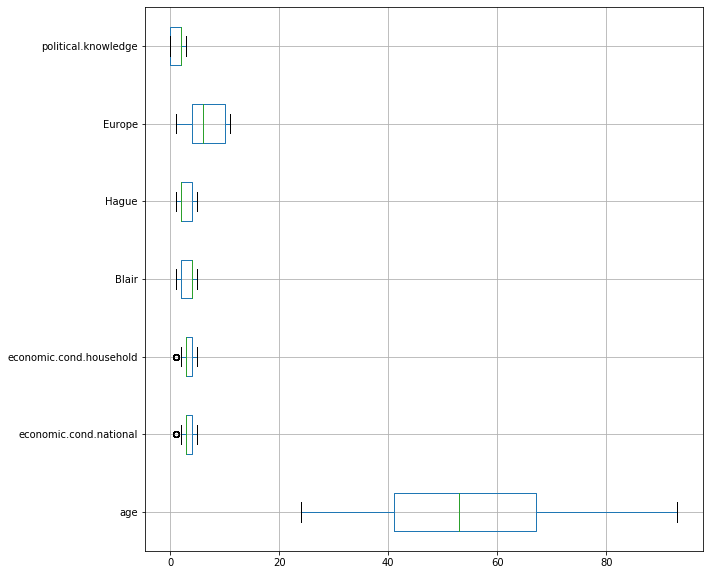

In [23]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

**The continues variable age has no outliers. So there is no need for outliers treatment.There are no outliers in the continous variables in the data set.**

## Bivariate Analysis

## Correlation:

In [24]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


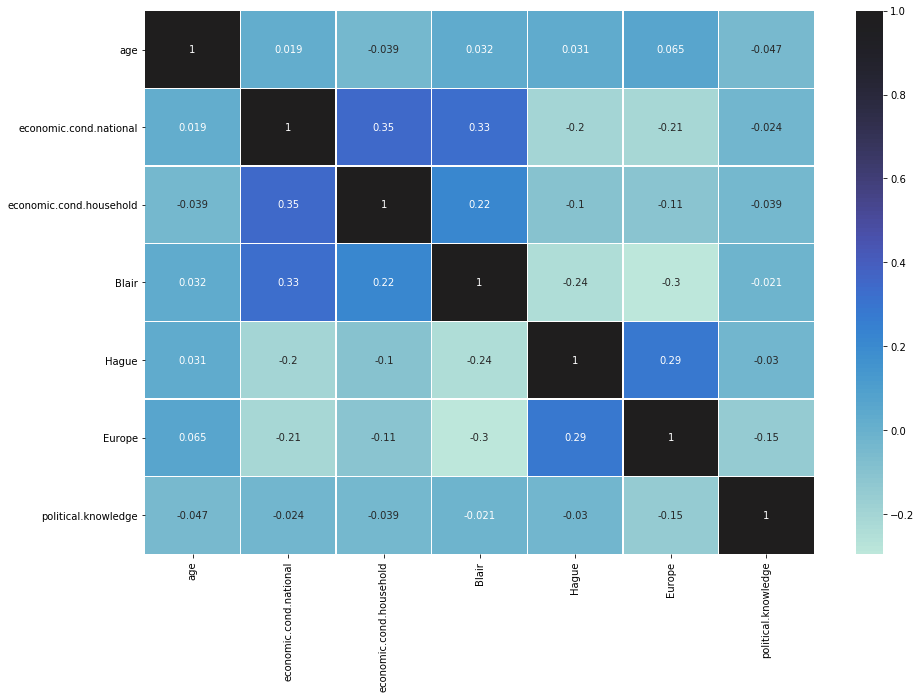

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), linewidths=.5,annot=True ,center = 1 )  # heatmap
plt.show()

**This heatmap shows between economic condition of household and Blair has a correlation of 0.22 which shows Blair has high assessment for economic condition while Hague has negatively correlated by the correlation of -0.1.**
**Hague has a high correlation of 0.29 towards European integration while Blair has negative correlation of -0.3.**

## Getting the unique values

In [26]:
for i in cat:
    df[i]=df[i].astype("object")

In [27]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




## Descriptive analysis

In [28]:
df.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517,1517.000000,1517.0,1517.0,1517.0,1517.0,1517.0,1517.0,1517
unique,2,NaN,5.0,5.0,5.0,5.0,11.0,4.0,2
top,Labour,NaN,3.0,3.0,4.0,2.0,11.0,2.0,female
freq,1057,NaN,604.0,645.0,833.0,617.0,338.0,776.0,808
mean,NaN,54.241266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.701741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


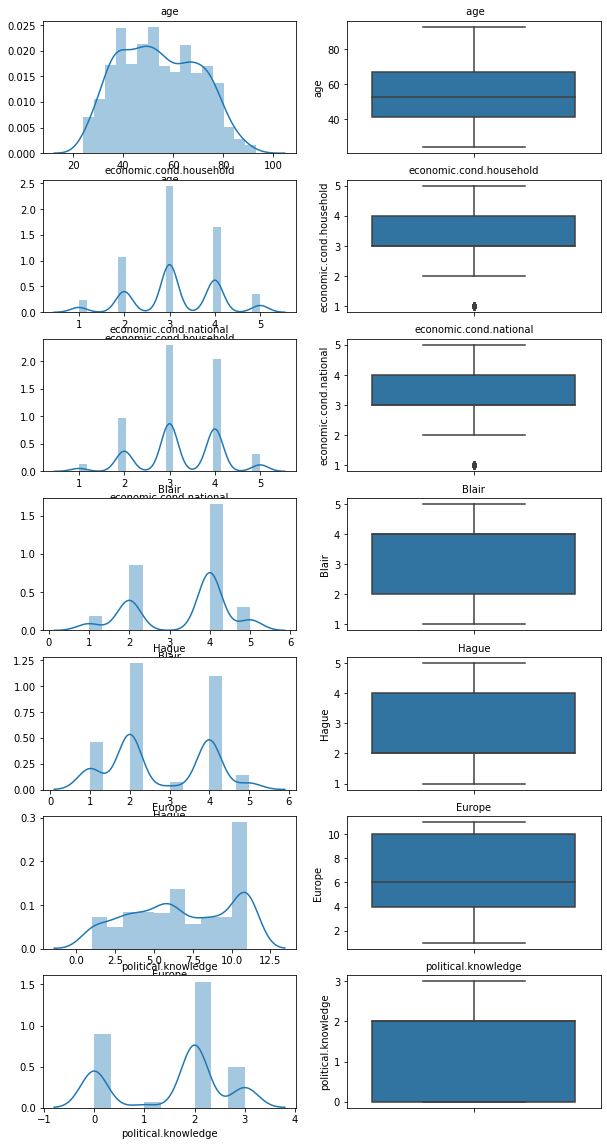

In [29]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age",fontsize=10) 

a = sns.distplot(df['economic.cond.household'] , ax=axes[1][0])
a.set_title("economic.cond.household",fontsize=10) 

a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title("economic.cond.national",fontsize=10) 

a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair",fontsize=10) 

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague",fontsize=10) 

a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge",fontsize=10) 
a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.household",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.national",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge",fontsize=10)

plt.show()

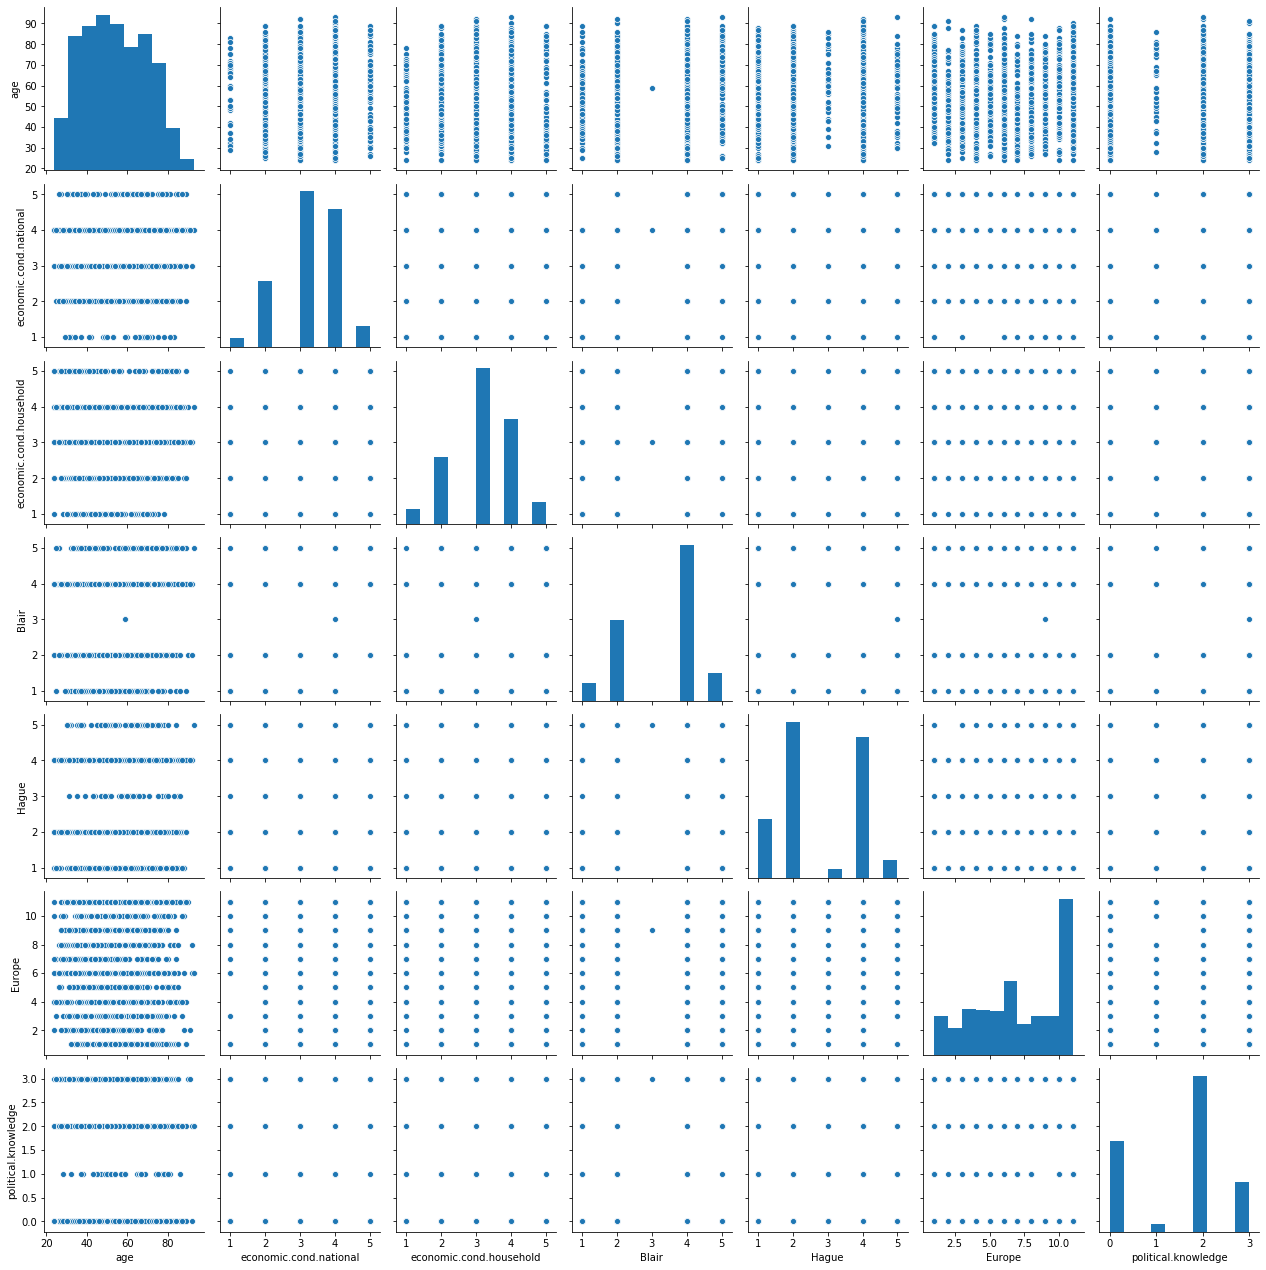

In [30]:
sns.pairplot(df)

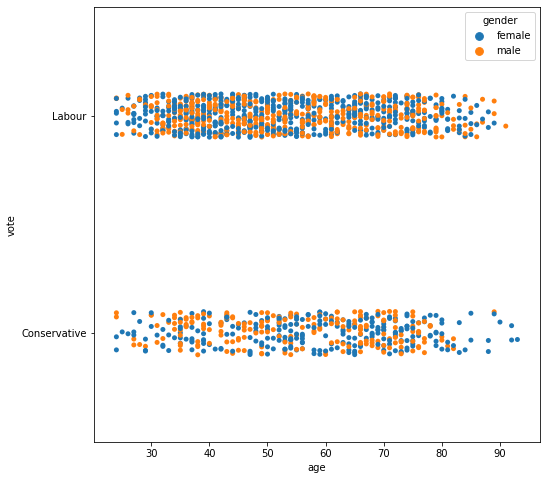

In [31]:
plt.figure(figsize=(8,8))
sns.stripplot(df['age'], df['vote'], jitter=True,hue=df['gender'] ) 
plt.show()

**This scatter plot is between variable vote and age and  there are more female pollster are in Labour party.**

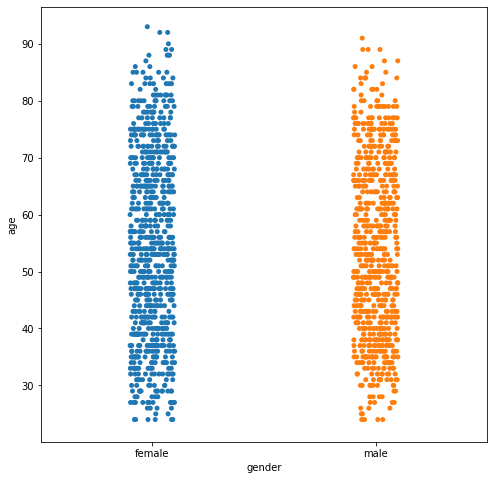

In [32]:
plt.figure(figsize=(8,8))
sns.stripplot(df["gender"], df['age'], jitter=True) 
plt.show()

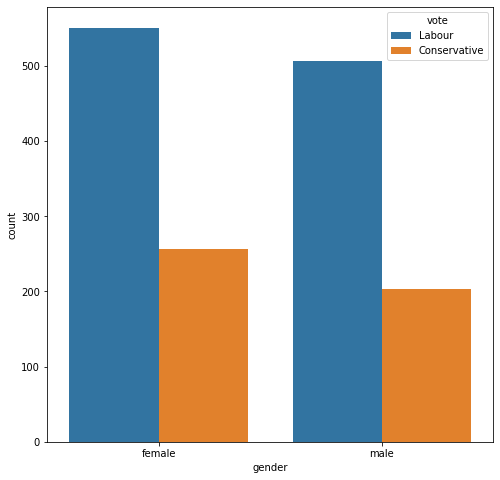

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(df["gender"],hue= df['vote']) 
plt.show()

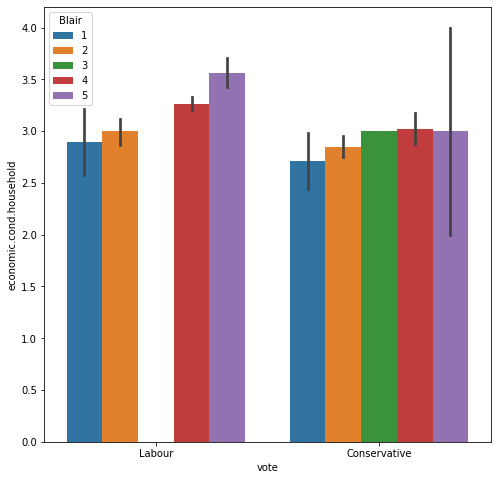

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['economic.cond.household'],hue=df.Blair) 
plt.show()

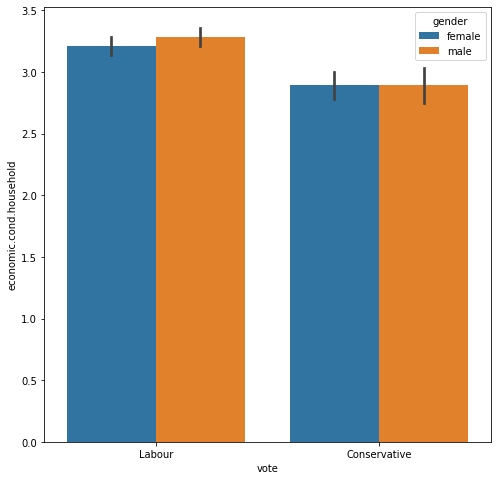

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['economic.cond.household'],hue=df.gender) 
plt.show()

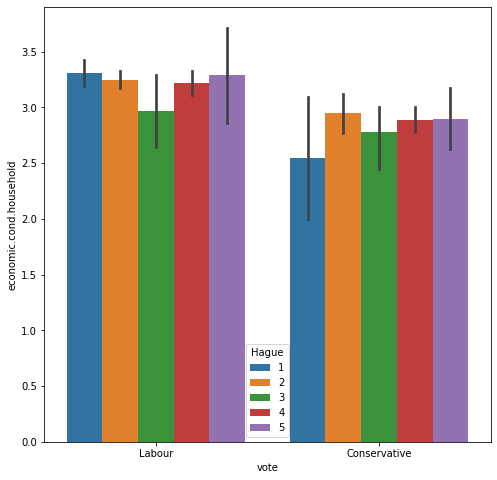

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['economic.cond.household'],hue=df.Hague) 
plt.show()

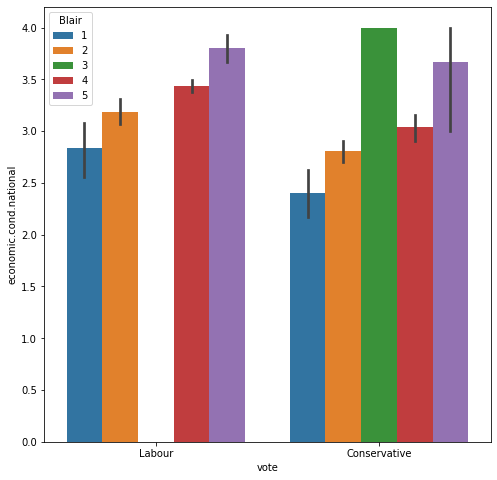

In [37]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['economic.cond.national'],hue=df.Blair) 
plt.show()

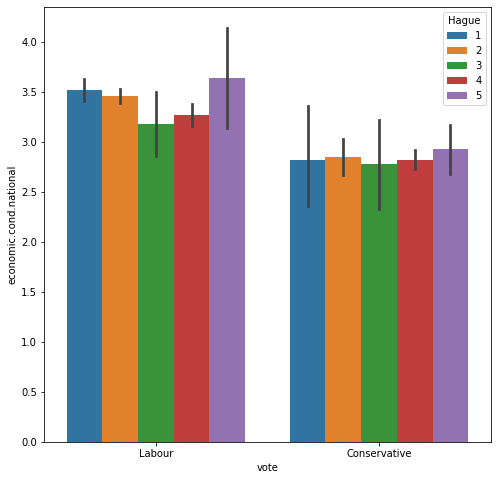

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['economic.cond.national'],hue=df.Hague) 
plt.show()

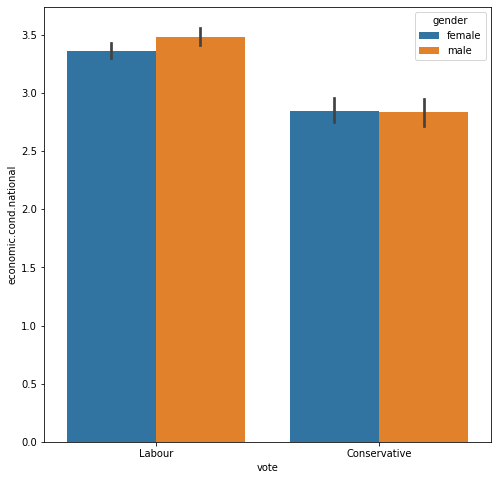

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['economic.cond.national'],hue=df.gender) 
plt.show()

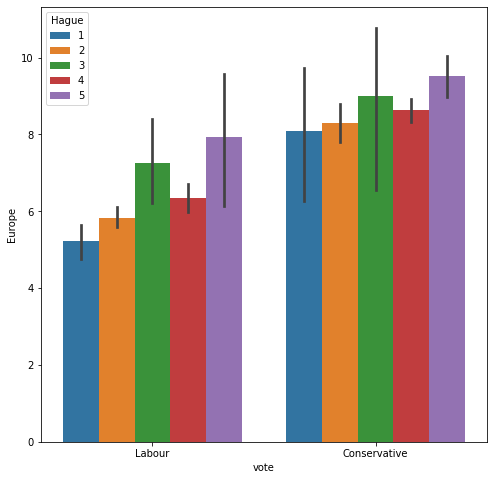

In [40]:
plt.figure(figsize=(8,8))
sns.barplot(df["vote"], df['Europe'],hue=df.Hague) 
plt.show()

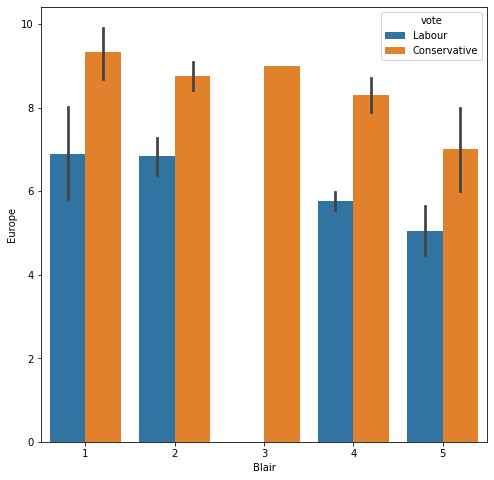

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(df["Blair"], df['Europe'],hue=df.vote) 
plt.show()

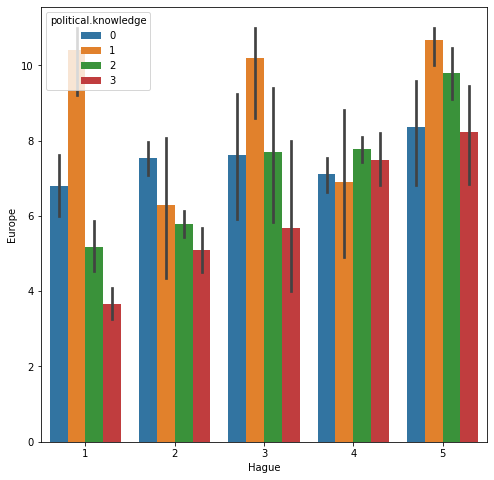

In [42]:
plt.figure(figsize=(8,8))
sns.barplot(df['Hague'], df['Europe'],hue=df['political.knowledge']) 
plt.show()

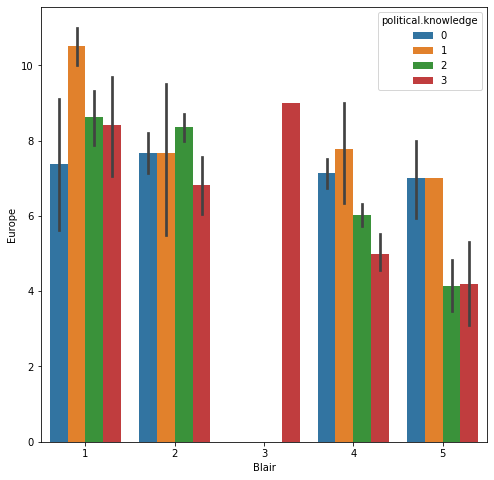

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(df['Blair'], df['Europe'],hue=df['political.knowledge']) 
plt.show()

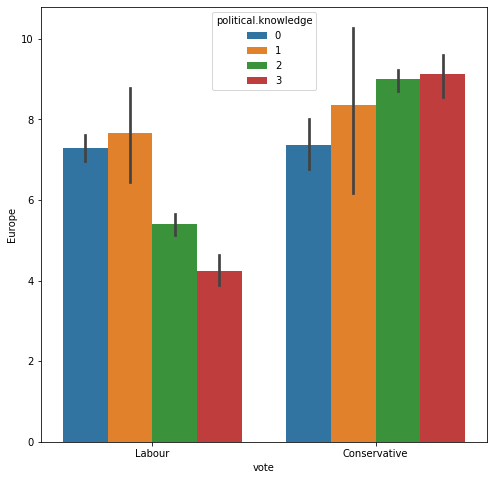

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(df['vote'], df['Europe'],hue=df['political.knowledge']) 
plt.show()

## 3 1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

In [45]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print('Categorial Variable:',cat) 
print('Numerical Variables:',num)


Categorial Variable: ['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
Numerical Variables: ['age']


In [46]:
print(pd.Categorical(df['vote'].unique()))
print(pd.Categorical(df['vote'].unique()).codes)
df['vote'] = pd.Categorical(df['vote']).codes

print(pd.Categorical(df['gender'].unique()))
print(pd.Categorical(df['gender'].unique()).codes)
df['gender'] = pd.Categorical(df['gender']).codes

[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]
[female, male]
Categories (2, object): [female, male]
[0 1]


In [47]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


## Standardisation for the variable

In [48]:
df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,0.275362,3,3,4,1,2,2,0
1,1,0.173913,4,4,4,4,5,2,1
2,1,0.159420,4,4,5,2,3,2,1
3,1,0.000000,4,2,2,1,4,0,0
4,1,0.246377,2,2,1,1,6,2,1


**Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.**

**When you are working with data where each variable means something different, (e.g., age and weight) the fields are not directly comparable. One year is not equivalent to one pound, and may or may not have the same level of importance in sorting a group of records. In a situation where one field has a much greater range of value than another (because the field with the wider range of values likely has greater distances between values), it may end up being the primary driver of what defines clusters. Standardization helps to make the relative weight of each variable equal by converting each variable to a unitless measure or relative distance.**

**In this data set the variable age is on a different scale then the other variables.So it is necessary to standardize the variacle before data processing.**

## Split X and y into training and test set in 70:30 ratio

In [49]:
X =  df.drop("vote",axis=1) ## Features
y = df["vote"]  ## Target

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Modelling:

## 1. Apply Logistic Regression and LDA (linear discriminant analysis).

In [51]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


## Fit the Logistic Regression model


In [54]:

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [55]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [56]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Confusion matrix on the training data

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



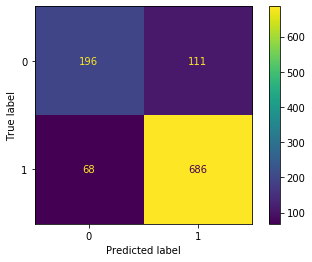

In [57]:
plot_confusion_matrix(model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

## Precision Recall for Conservative party For Train data

In [58]:
log_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.86
log_train_recall  0.91
log_train_f1  0.88


## Precision Recall for Labour party for Train data

In [59]:
log_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision0=round(df.loc["0"][0],2)
log_train_recall0=round(df.loc["0"][1],2)
log_train_f10=round(df.loc["0"][2],2)
print ('log_train_precision ',log_train_precision0)
print ('log_train_recall ',log_train_recall0)
print ('log_train_f1 ',log_train_f10)

log_train_precision  0.74
log_train_recall  0.64
log_train_f1  0.69


## Confusion matrix on the test data

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



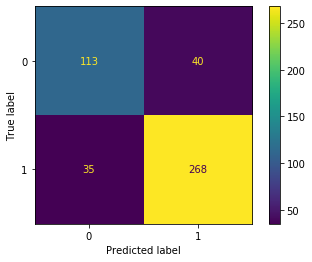

In [60]:
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Precision Recall for Conservative party for test

In [61]:
log_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.87
log_test_recall  0.88
log_test_f1  0.88


## Precision Recall for Labour party for Test

In [62]:
log_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision0=round(df.loc["0"][0],2)
log_test_recall0=round(df.loc["0"][1],2)
log_test_f10=round(df.loc["0"][2],2)
print ('log_test_precision ',log_test_precision0)
print ('log_test_recall ',log_test_recall0)
print ('log_test_f1 ',log_test_f10)

log_test_precision  0.76
log_test_recall  0.74
log_test_f1  0.75


## Accuracy - Training Data


In [63]:
log_train_acc = model.score(X_train, y_train)
log_train_acc

0.8312912346842601

## Accuracy - Test Data

In [64]:
log_test_acc = model.score(X_train, y_train)
log_test_acc

0.8312912346842601

## AOC ROC Curve fro Training and Test Data

AUC: 0.890


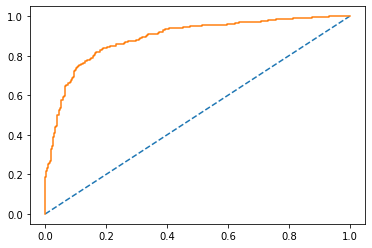

In [65]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);

AUC: 0.883


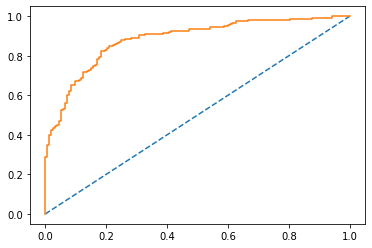

In [66]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr);

## Linear Discriminant Analysis

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [68]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lmodel=clf.fit(X_train,y_train)

In [69]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lmodel.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lmodel.predict(X_test)

In [70]:
# Accuracy - Training data
lda_train_acc = lmodel.score(X_train, y_train)
lda_train_acc

0.8341187558906692

In [71]:
# Accuracy - Test Data
lda_test_acc = lmodel.score(X_test, y_test)
lda_test_acc

0.8333333333333334

## Plotting confusion matrix for the Training and Test Data

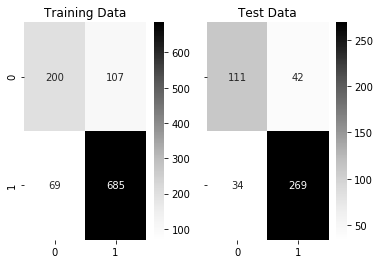

In [72]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)



plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


## Classification Report for Training And Test data

In [73]:
print('Classification Report of the training data:\n\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:


               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



## Precision Recall for Conservative party for Train data

In [74]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.86
lda_train_recall  0.91
lda_train_f1  0.89


## Precision Recall for Labour party for Train data

In [75]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision0=round(df.loc["0"][0],2)
lda_train_recall0=round(df.loc["0"][1],2)
lda_train_f10=round(df.loc["0"][2],2)
print ('lda_train_precision ',lda_train_precision0)
print ('lda_train_recall ',lda_train_recall0)
print ('lda_train_f1 ',lda_train_f10)

lda_train_precision  0.74
lda_train_recall  0.65
lda_train_f1  0.69


## Precision Recall for Conservative party for Test data

In [76]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.86
lda_test_recall  0.89
lda_test_f1  0.88


## Precision Recall for Test party for Test data

In [77]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision0=round(df.loc["0"][0],2)
lda_test_recall0=round(df.loc["0"][1],2)
lda_test_f10=round(df.loc["0"][2],2)
print ('lda_test_precision ',lda_test_precision0)
print ('lda_test_recall ',lda_test_recall0)
print ('lda_test_f1 ',lda_test_f10)

lda_test_precision  0.77
lda_test_recall  0.73
lda_test_f1  0.74


In [78]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [79]:
pred_prob_train[:,1]

array([0.06817528, 0.90301615, 0.70158445, ..., 0.74417947, 0.7594618 ,
       0.97584922])

## AUC and ROC for the Train and Test data

AUC for the Training Data: 0.890


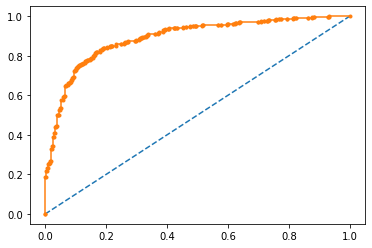

In [80]:


# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')




AUC for the Test Data: 0.883


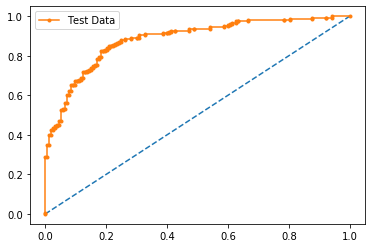

In [81]:


# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Change the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.7465
F1 Score 0.8476 

Confusion Matrix


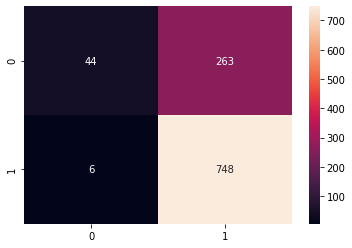

0.2 

Accuracy Score 0.7766
F1 Score 0.8608 

Confusion Matrix


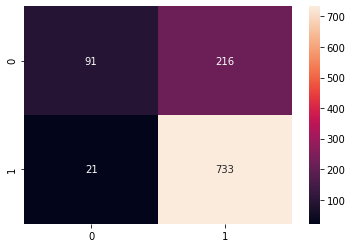

0.3 

Accuracy Score 0.7983
F1 Score 0.8709 

Confusion Matrix


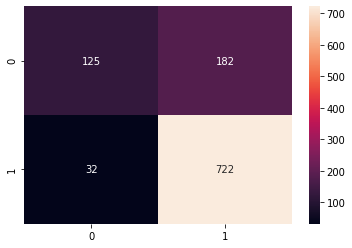

0.4 

Accuracy Score 0.8294
F1 Score 0.8872 

Confusion Matrix


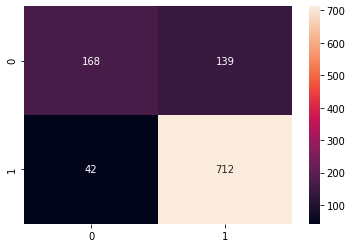

0.5 

Accuracy Score 0.8313
F1 Score 0.8846 

Confusion Matrix


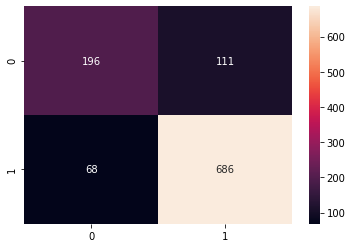

0.6 

Accuracy Score 0.8275
F1 Score 0.8779 

Confusion Matrix


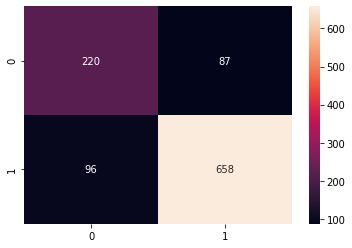

0.7 

Accuracy Score 0.8266
F1 Score 0.872 

Confusion Matrix


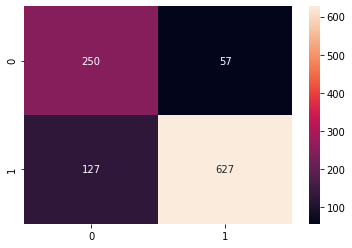

0.8 

Accuracy Score 0.7832
F1 Score 0.8284 

Confusion Matrix


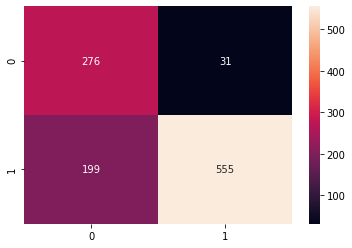

0.9 

Accuracy Score 0.6711
F1 Score 0.707 

Confusion Matrix


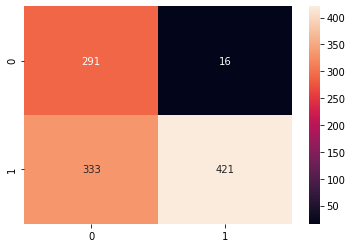

In [82]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

**From this we can observe that, Logistic regression has slightly better performance than the Linear Discriminatory Analysis.As it has better accuracy and F1 score.**

**Overall both the models are reasonaly stable enough to be used for making any future predictions.**

# 2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)

## Gaussian Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [85]:
ytest_predict_prob=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733


## Confusion matrix on Training data

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



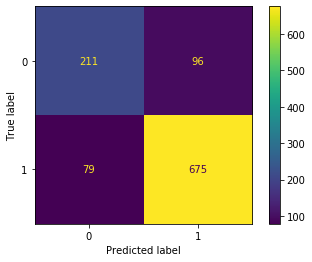

In [86]:
plot_confusion_matrix(NB_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

## Precision Recall for conservative party Train data

In [87]:
NB_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][0],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][1],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.86
NB_train_recall  0.91
NB_train_f1  0.91


## Precision Recall for conservative party Test data

In [88]:
NB_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision0=round(df.loc["0"][0],2)
NB_train_recall0=round(df.loc["0"][1],2)
NB_train_f10=round(df.loc["0"][2],2)
print ('NB_train_precision ',NB_train_precision0)
print ('NB_train_recall ',NB_train_recall0)
print ('NB_train_f1 ',NB_train_f10)

NB_train_precision  0.74
NB_train_recall  0.64
NB_train_f1  0.69


## Confusion matrix on the Test data

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



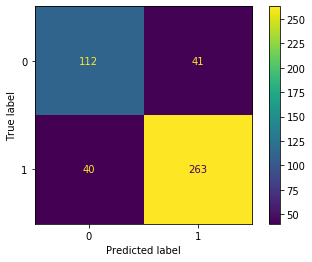

In [89]:
plot_confusion_matrix(NB_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Precision Recall for Conservative party for Test data

In [90]:
NB_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.87
NB_test_recall  0.88
NB_test_f1  0.88


## Precision Recall for Labour party for Test data

In [91]:
NB_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision0=round(df.loc["0"][0],2)
NB_test_recall0=round(df.loc["0"][1],2)
NB_test_f10=round(df.loc["0"][2],2)
print ('NB_test_precision ',NB_test_precision0)
print ('NB_test_recall ',NB_test_recall0)
print ('NB_test_f1 ',NB_test_f10)

NB_test_precision  0.76
NB_test_recall  0.74
NB_test_f1  0.75


In [92]:
# Accuracy - Training Data
NB_train_acc = NB_model.score(X_train, y_train)
NB_train_acc

0.8350612629594723

## AUC and Roc Curve for Test and Train data

AUC: 0.888


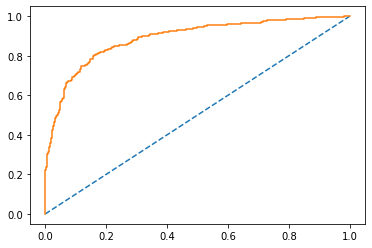

In [93]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr);

In [94]:
# Accuracy - Test Data
NB_test_acc = NB_model.score(X_test, y_test)
NB_test_acc

0.8223684210526315

AUC: 0.876


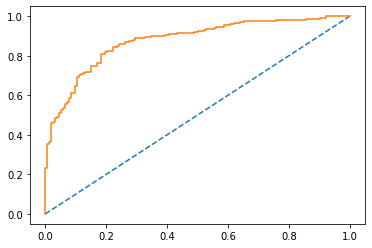

In [95]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr);

## KNN Model

In [96]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [97]:
ytest_predict_prob=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.6,0.4
1,0.2,0.8
2,0.0,1.0
3,0.8,0.2
4,0.2,0.8


## Confusion matrix on Training data

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



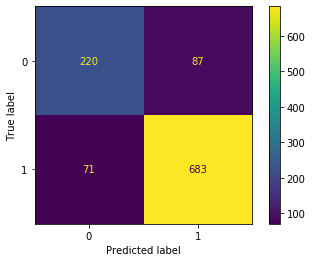

In [98]:
plot_confusion_matrix(KNN_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [99]:
# Accuracy - Training Data
KNN_train_acc = KNN_model.score(X_train, y_train)
KNN_train_acc

0.8510838831291234

## Precision Recall for Conservative party for Train data

In [100]:
KNN_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_train_precision=round(df.loc["1"][1],2)
KNN_train_recall=round(df.loc["1"][2],2)
KNN_train_f1=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.88
KNN_train_recall  0.88
KNN_train_f1  0.87


## Precision Recall for Labour Party for Train data

In [101]:
KNN_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_train_precision0=round(df.loc["0"][1],2)
KNN_train_recall0=round(df.loc["0"][2],2)
KNN_train_f10=round(df.loc["0"][0],2)
print ('KNN_train_precision ',KNN_train_precision0)
print ('KNN_train_recall ',KNN_train_recall0)
print ('KNN_train_f1 ',KNN_train_f10)

KNN_train_precision  0.74
KNN_train_recall  0.75
KNN_train_f1  0.76


## Confusion matrix on the Test data

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



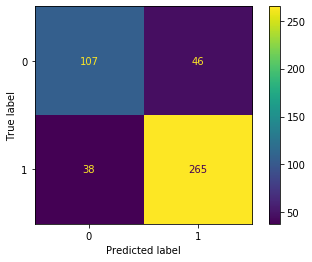

In [102]:
plot_confusion_matrix(KNN_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [103]:
# Accuracy - Test Data
KNN_test_acc = KNN_model.score(X_test, y_test)
KNN_test_acc

0.8157894736842105

## Precision Recall for Conservative party for Test data

In [104]:
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_test_precision=round(df.loc["1"][1],2)
KNN_test_recall=round(df.loc["1"][2],2)
KNN_test_f1=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.88
KNN_test_recall  0.88
KNN_test_f1  0.87


## Precision Recall for Labour party for Test data

In [105]:
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_test_precision0=round(df.loc["0"][1],2)
KNN_test_recall0=round(df.loc["0"][2],2)
KNN_test_f10=round(df.loc["0"][0],2)
print ('KNN_test_precision ',KNN_test_precision0)
print ('KNN_test_recall ',KNN_test_recall0)
print ('KNN_test_f1 ',KNN_test_f10)

KNN_test_precision  0.74
KNN_test_recall  0.75
KNN_test_f1  0.76


## AUC and ROC Curve for Test and Train data

AUC: 0.927


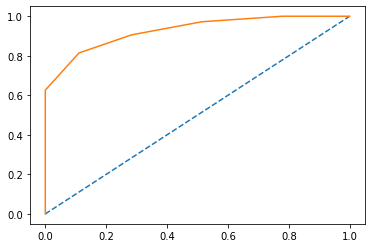

In [106]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr);

AUC: 0.865


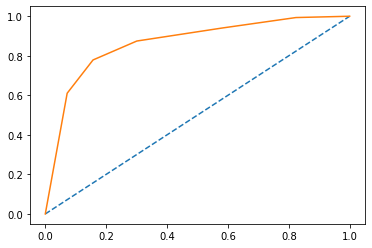

In [107]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr);

**Looking at Recalls, Training accuracy and Test accuracy. Both the Naive bayes and KNN Model seems to be performing well.**

**KNN has better AUC of 0.93 then Logistic regression, LDA and Naive Bayes theorem while the Naive bayes has better Precision of 0.91.So we have tune the model to get better model.**

# 3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)

## Model Tuning

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## Logistic Regression

In [109]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [110]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832872 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [111]:
best_model = grid_search.best_estimator_

In [112]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [113]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423421,0.576579
1,0.156456,0.843544
2,0.006210,0.993790
3,0.841588,0.158412
4,0.068326,0.931674


              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 



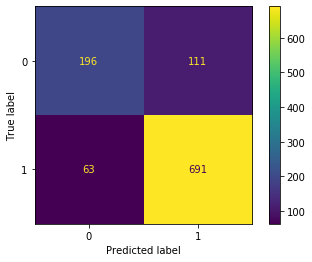

In [114]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



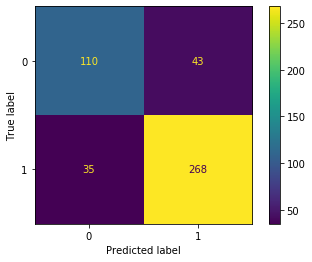

In [115]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [116]:
## Linear Discrimination Analysis

In [117]:
model = LinearDiscriminantAnalysis()
solvers = ['svd', 'lsqr', 'eigen']
shrinkage=['none','float','auto']
tol=['0.001','0.0001','0.00001']
# define grid search
grid = dict(solver=solvers,shrinkage=shrinkage,tol=tol)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [118]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.831623 using {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': '0.001'}


In [119]:
best_model = grid_search.best_estimator_

In [120]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [121]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.464078,0.535922
1,0.138634,0.861366
2,0.004855,0.995145
3,0.870216,0.129784
4,0.054100,0.945900


              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



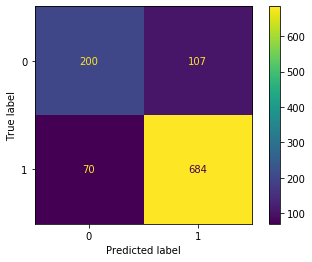

In [122]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



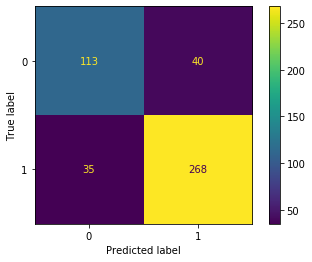

In [123]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## KNN Model

In [124]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22368421052631582,
 0.19517543859649122,
 0.1842105263157895,
 0.19517543859649122,
 0.17543859649122806,
 0.17105263157894735,
 0.18201754385964908,
 0.16666666666666663,
 0.16666666666666663,
 0.17105263157894735]

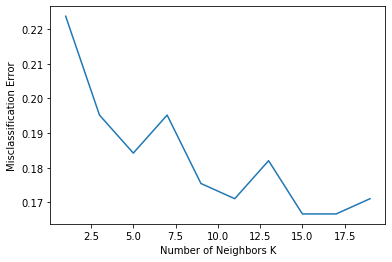

In [125]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**For K = 15 it is giving the best test accuracy lets check train and test data.**

In [126]:

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [127]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416588124410933
[[206 101]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [128]:
# Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[110  43]
 [ 33 270]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [129]:
0.8416588124410933-0.8333333333333334

0.008325479107759937

**As the difference between train and test accuracies is less than 10%, it is a valid model.**

In [130]:
# Accuracy - Training Data
KNN_train_acc = KNN_model.score(X_train, y_train)
KNN_train_acc

0.8416588124410933

## Precision Recall for Conservative party for Train data

In [131]:
KNN_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_train_precision=round(df.loc["1"][1],2)
KNN_train_recall=round(df.loc["1"][2],2)
KNN_train_f1=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.88
KNN_train_recall  0.88
KNN_train_f1  0.87


## Precision Recall for Labour Party for Train data

In [132]:
KNN_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_train_precision0=round(df.loc["0"][1],2)
KNN_train_recall0=round(df.loc["0"][2],2)
KNN_train_f10=round(df.loc["0"][0],2)
print ('KNN_train_precision ',KNN_train_precision0)
print ('KNN_train_recall ',KNN_train_recall0)
print ('KNN_train_f1 ',KNN_train_f10)

KNN_train_precision  0.74
KNN_train_recall  0.75
KNN_train_f1  0.76


In [133]:
# Accuracy - Test Data
KNN_test_acc = KNN_model.score(X_test, y_test)
KNN_test_acc

0.8333333333333334

## Precision Recall for Conservative party for Test data

In [134]:
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_test_precision=round(df.loc["1"][1],2)
KNN_test_recall=round(df.loc["1"][2],2)
KNN_test_f1=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.88
KNN_test_recall  0.88
KNN_test_f1  0.87


## Precision Recall for Labour party for Test data

In [135]:
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
KNN_test_precision0=round(df.loc["0"][1],2)
KNN_test_recall0=round(df.loc["0"][2],2)
KNN_test_f10=round(df.loc["0"][0],2)
print ('KNN_test_precision ',KNN_test_precision0)
print ('KNN_test_recall ',KNN_test_recall0)
print ('KNN_test_f1 ',KNN_test_f10)

KNN_test_precision  0.74
KNN_test_recall  0.75
KNN_test_f1  0.76


## AUC and ROC Curve for Test and Train data

AUC: 0.906


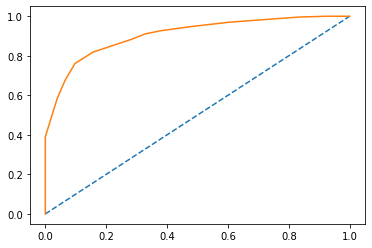

In [136]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr);

AUC: 0.889


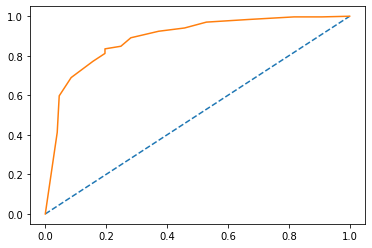

In [137]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr);

## Ada Boost

In [138]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [139]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [140]:
ADB_test_acc = ADB_model.score(X_test, y_test)
ADB_test_acc

0.8135964912280702

In [141]:
ADB_train_acc = ADB_model.score(X_train, y_train)
ADB_train_acc

0.8501413760603205

In [142]:
## Precision Recall for Conservative party for Test data

In [143]:
ADB_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_train_precision=round(df.loc["1"][0],2)
ADB_train_recall=round(df.loc["1"][1],2)
ADB_train_f1=round(df.loc["1"][2],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_precision  0.88
ADB_train_recall  0.91
ADB_train_f1  0.9


In [144]:
## Precision Recall for Labour party for Test data

In [145]:
ADB_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_train_precision0=round(df.loc["0"][0],2)
ADB_train_recall0=round(df.loc["0"][1],2)
ADB_train_f10=round(df.loc["0"][2],2)
print ('ADB_train_precision ',ADB_train_precision0)
print ('ADB_train_recall ',ADB_train_recall0)
print ('ADB_train_f1 ',ADB_train_f10)

ADB_train_precision  0.76
ADB_train_recall  0.7
ADB_train_f1  0.73


In [146]:
##Precision Recall for Conservative party for Test data

In [147]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [148]:
ADB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision=round(df.loc["1"][0],2)
ADB_test_recall=round(df.loc["1"][1],2)
ADB_test_f1=round(df.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_precision  0.84
ADB_test_recall  0.88
ADB_test_f1  0.86


In [190]:
ADB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision0=round(df.loc["0"][0],2)
ADB_test_recall0=round(df.loc["0"][1],2)
ADB_test_f10=round(df.loc["0"][2],2)
print ('ADB_test_precision ',ADB_test_precision0)
print ('ADB_test_recall ',ADB_test_recall0)
print ('ADB_test_f1 ',ADB_test_f10)

ADB_test_precision  0.78
ADB_test_recall  0.68
ADB_test_f1  0.73


AUC: 0.915


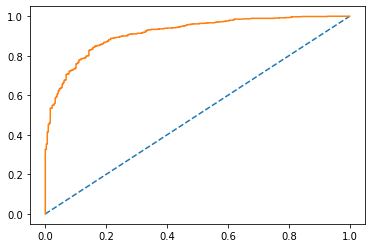

In [150]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr, ADB_train_tpr, ADB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr);

AUC: 0.877


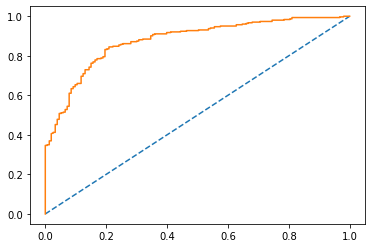

In [151]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr, ADB_test_tpr, ADB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr);

## Gradient Boosting

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [153]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [154]:
gbcl_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_precision=round(df.loc["1"][0],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_f1=round(df.loc["1"][2],2)
print ('GBCL_train_precision ',gbcl_train_precision)
print ('GBCL_train_recall ',gbcl_train_recall)
print ('GBCL_train_f1 ',gbcl_train_f1)

GBCL_train_precision  0.91
GBCL_train_recall  0.94
GBCL_train_f1  0.93


In [155]:
gbcl_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_precision0=round(df.loc["0"][0],2)
gbcl_train_recall0=round(df.loc["0"][1],2)
gbcl_train_f10=round(df.loc["0"][2],2)
print ('GBCL_train_precision ',gbcl_train_precision0)
print ('GBCL_train_recall ',gbcl_train_recall0)
print ('GBCL_train_f1 ',gbcl_train_f10)

GBCL_train_precision  0.84
GBCL_train_recall  0.78
GBCL_train_f1  0.81


In [156]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [157]:
## Precision Recall for Conservative party for Test data

In [158]:
gbcl_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(df.loc["1"][0],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_f1=round(df.loc["1"][2],2)
print ('GBCL_test_precision ',gbcl_test_precision)
print ('GBCL_test_recall ',gbcl_test_recall)
print ('GBCL_test_f1 ',gbcl_test_f1)

GBCL_test_precision  0.85
GBCL_test_recall  0.91
GBCL_test_f1  0.88


In [159]:
gbcl_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision0=round(df.loc["0"][0],2)
gbcl_test_recall0=round(df.loc["0"][1],2)
gbcl_test_f10=round(df.loc["0"][2],2)
print ('GBCL_test_precision ',gbcl_test_precision0)
print ('GBCL_test_recall ',gbcl_test_recall0)
print ('GBCL_test_f1 ',gbcl_test_f10)

GBCL_test_precision  0.79
GBCL_test_recall  0.68
GBCL_test_f1  0.73


In [160]:
## Accuracy of Training and Test Data:

In [161]:
gbcl_test_acc = gbcl.score(X_test, y_test)
gbcl_test_acc

0.8333333333333334

In [162]:
gbcl_train_acc = gbcl.score(X_train, y_train)
gbcl_train_acc

0.8925541941564562

AUC: 0.951


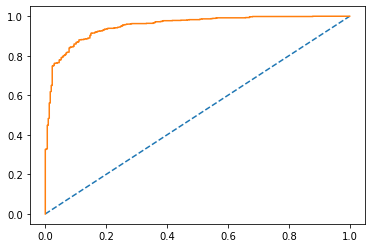

In [163]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

AUC: 0.899


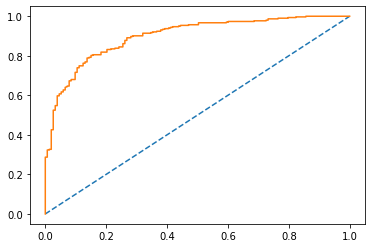

In [164]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

## Bagging


In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
from sklearn.ensemble import BaggingClassifier

In [167]:
rfcl = RandomForestClassifier(n_estimators = 100)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [168]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9670122525918945
[[277  30]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [169]:
Bagging_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_train_precision=round(df.loc["1"][0],2)
Bagging_train_recall=round(df.loc["1"][1],2)
Bagging_train_f1=round(df.loc["1"][2],2)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_precision  0.96
Bagging_train_recall  0.99
Bagging_train_f1  0.98


In [170]:
Bagging_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_train_precision0=round(df.loc["0"][0],2)
Bagging_train_recall0=round(df.loc["0"][1],2)
Bagging_train_f10=round(df.loc["0"][2],2)
print ('Bagging_train_precision ',Bagging_train_precision0)
print ('Bagging_train_recall ',Bagging_train_recall0)
print ('Bagging_train_f1 ',Bagging_train_f10)

Bagging_train_precision  0.98
Bagging_train_recall  0.9
Bagging_train_f1  0.94


In [171]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [172]:
Bagging_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_test_precision=round(df.loc["1"][0],2)
Bagging_test_recall=round(df.loc["1"][1],2)
Bagging_test_f1=round(df.loc["1"][2],2)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_precision  0.85
Bagging_test_recall  0.9
Bagging_test_f1  0.88


In [174]:
Bagging_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_test_precision0=round(df.loc["0"][0],2)
Bagging_test_recall0=round(df.loc["0"][1],2)
Bagging_test_f10=round(df.loc["0"][2],2)
print ('Bagging_test_precision ',Bagging_test_precision0)
print ('Bagging_test_recall ',Bagging_test_recall0)
print ('Bagging_test_f1 ',Bagging_test_f10)

Bagging_test_precision  0.78
Bagging_test_recall  0.68
Bagging_test_f1  0.73


In [175]:
## Accuracy of Training and Test Data:

In [176]:
Bagging_test_acc = Bagging_model.score(X_test, y_test)
Bagging_test_acc

0.8289473684210527

In [177]:
Bagging_train_acc = Bagging_model.score(X_train, y_train)
Bagging_train_acc

0.9670122525918945

AUC: 0.997


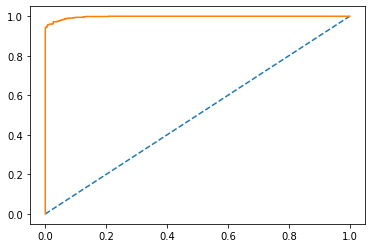

In [178]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bagging_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Bagging_train_auc)
# calculate roc curve
Bagging_train_fpr, Bagging_train_tpr, Bagging_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bagging_train_fpr, Bagging_train_tpr);

AUC: 0.896


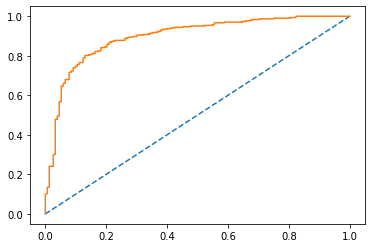

In [179]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bagging_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % Bagging_test_auc)
# calculate roc curve
Bagging_test_fpr, Bagging_test_tpr, Bagging_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bagging_test_fpr, Bagging_test_tpr);

## 4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

## Comparision of AUC and ROC Curve Test and training data for LDA,Logistic regression, Naive Bayes, KNN Bagging and Boosting

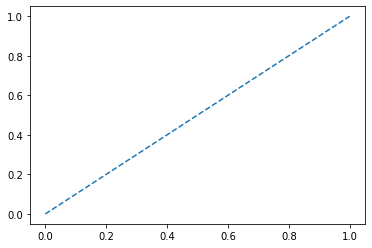

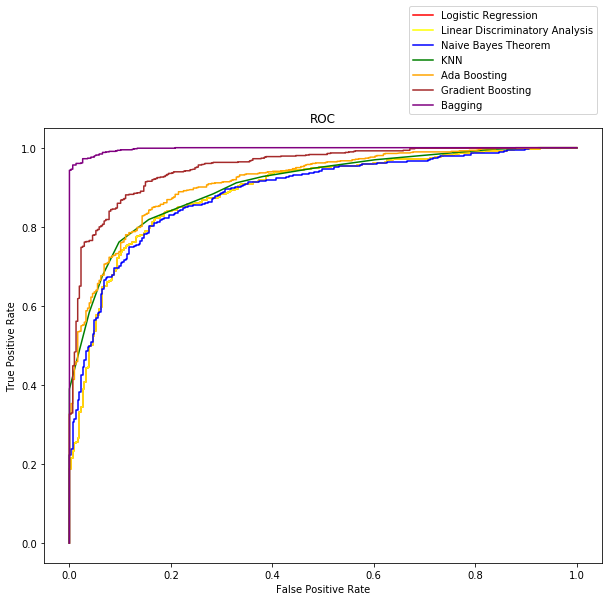

In [182]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.figure(figsize=(10,8))
plt.plot(log_train_fpr, log_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.plot(NB_train_fpr, NB_train_tpr,color='blue',label="Naive Bayes Theorem")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='green',label="KNN")
plt.plot(ADB_train_fpr,ADB_train_tpr,color='orange',label="Ada Boosting")
plt.plot(gbcl_train_fpr, gbcl_train_tpr,color='brown',label="Gradient Boosting")
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='purple',label="Bagging")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

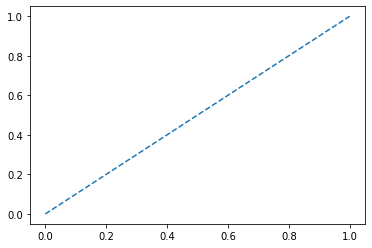

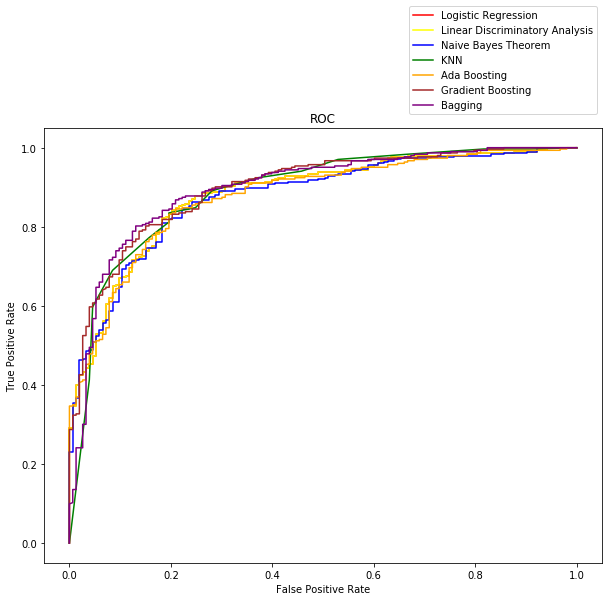

In [183]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.figure(figsize=(10,8))
plt.plot(log_test_fpr, log_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.plot(NB_test_fpr, NB_test_tpr,color='blue',label="Naive Bayes Theorem")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='green',label="KNN")
plt.plot(ADB_test_fpr,ADB_test_tpr,color='orange',label="Ada Boosting")
plt.plot(gbcl_test_fpr, gbcl_test_tpr,color='brown',label="Gradient Boosting")
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='purple',label="Bagging")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Comparision table for TEST and TRAIN data for Conservative party

In [185]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Logistic Regression Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Linear Discriminent Analysis Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'Linear Discriminent Analysis Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'Naive Bayes Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'Naive Bayes Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],                   
        'ADA Boosting Train':[ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'ADA Boosting Test':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
        'Gradient Boosing Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'Gradient Boosing Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
       'Bagging Train':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
        'Bagging Test':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1]
       
       },index=index)
round(dt,2)

,Logistic Regression Train,Logistic Regression Test,Linear Discriminent Analysis Train,Linear Discriminent Analysis Test,Naive Bayes Train,Naive Bayes Test,KNN Train,KNN Test,ADA Boosting Train,ADA Boosting Test,Gradient Boosing Train,Gradient Boosing Test,Bagging Train,Bagging Test
Accuracy,0.83,0.83,0.83,0.83,0.84,0.82,0.84,0.83,0.85,0.81,0.89,0.83,0.97,0.83
AUC,0.89,0.88,0.89,0.88,0.89,0.88,0.91,0.89,0.91,0.88,0.95,0.90,1.00,0.90
Recall,0.91,0.88,0.91,0.89,0.91,0.88,0.88,0.88,0.91,0.67,0.94,0.91,0.99,0.90
Precision,0.86,0.87,0.86,0.86,0.86,0.87,0.88,0.88,0.88,0.75,0.91,0.85,0.96,0.85
F1 Score,0.88,0.88,0.89,0.88,0.91,0.88,0.87,0.87,0.90,0.71,0.93,0.88,0.98,0.88


## Comparision table for TEST and TRAIN data for Labour party

In [192]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Train':[log_train_acc,log_train_auc,log_train_recall0,log_train_precision0,log_train_f10],
        'Logistic Regression Test':[log_test_acc,log_test_auc,log_test_recall0,log_test_precision0,log_test_f10],
       'Linear Discriminent Analysis Train':[lda_train_acc,lda_train_auc,lda_train_recall0,lda_train_precision0,lda_train_f10],
        'Linear Discriminent Analysis Test':[lda_test_acc,lda_test_auc,lda_test_recall0,lda_test_precision0,lda_test_f10],
        'Naive Bayes Train':[NB_train_acc,NB_train_auc,NB_train_recall0,NB_train_precision0,NB_train_f10],
        'Naive Bayes Test':[NB_test_acc,NB_test_auc,NB_test_recall0,NB_test_precision0,NB_test_f10],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall0,KNN_train_precision0,KNN_train_f10],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall0,KNN_test_precision0,KNN_test_f10],
       'ADA Boosting Train':[ADB_train_acc,ADB_train_auc,ADB_train_recall0,ADB_train_precision0,ADB_train_f10],
        'ADA Boosting Test':[ADB_test_acc,ADB_test_auc,ADB_test_recall0,ADB_test_precision0,ADB_test_f10],
        'Gradient Boosing Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall0,gbcl_train_precision0,gbcl_train_f10],
        'Gradient Boosing Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall0,gbcl_test_precision0,gbcl_test_f10],
       'Bagging Train':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall0,Bagging_train_precision0,Bagging_train_f10],
        'Bagging Test':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall0,Bagging_test_precision0,Bagging_test_f10]
       
       },index=index)
round(dt,2)

,Logistic Regression Train,Logistic Regression Test,Linear Discriminent Analysis Train,Linear Discriminent Analysis Test,Naive Bayes Train,Naive Bayes Test,KNN Train,KNN Test,ADA Boosting Train,ADA Boosting Test,Gradient Boosing Train,Gradient Boosing Test,Bagging Train,Bagging Test
Accuracy,0.83,0.83,0.83,0.83,0.84,0.82,0.84,0.83,0.85,0.81,0.89,0.83,0.97,0.83
AUC,0.89,0.88,0.89,0.88,0.89,0.88,0.91,0.89,0.91,0.88,0.95,0.90,1.00,0.90
Recall,0.64,0.74,0.65,0.73,0.64,0.74,0.75,0.75,0.70,0.68,0.78,0.68,0.90,0.68
Precision,0.74,0.76,0.74,0.77,0.74,0.76,0.74,0.74,0.76,0.78,0.84,0.79,0.98,0.78
F1 Score,0.69,0.75,0.69,0.74,0.69,0.75,0.76,0.76,0.73,0.73,0.81,0.73,0.94,0.73


**From these we can observe that, Naive Bayes, ADA Boosting and Gradient Boosting has better Precision recall value for both conservative party[1] and Labour party[0].It is also noted that bagging has a serious overshooting problem as its accuracy, precision-recall value varies greatly between test and train data.**

**KNN model ,Naive Bayes,ADA boosting and Gradient boosting has better AUC and these four models are performing better then Logistic regression and LDA and are reasonaly stable enough to be used for making any future predictions.**

# Inference: 5 marks
## 1. Based on these predictions, what are the insights? (5 marks)

In [224]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

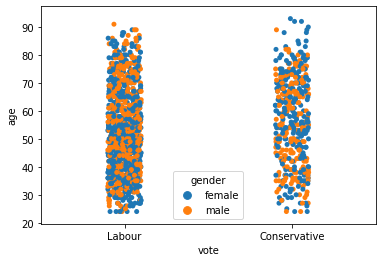

In [227]:
sns.stripplot(y='age', x=df.vote,hue='gender', data=df)

1. **From this stripplot between vote and age we can come to the conclution that the poll have high number of supporters of labour party.It is also people with higher age tend to support Conservative party while high number of supporters of labour party were around the age of 30 to 45.**
2. **The dataset is distributed not equally between the two parties as more mpople supports Labour party.**


AxesSubplot(0.125,0.125;0.775x0.755)


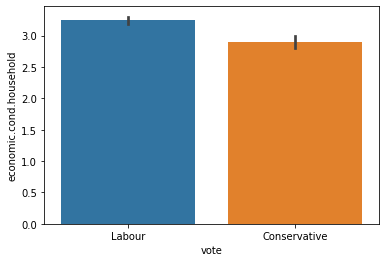

In [233]:
print(sns.barplot(y=df['economic.cond.household'], x=df.vote, data=df))


AxesSubplot(0.125,0.125;0.775x0.755)


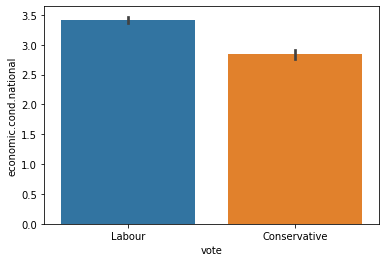

In [234]:
print(sns.barplot(y=df['economic.cond.national'], x=df.vote, data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


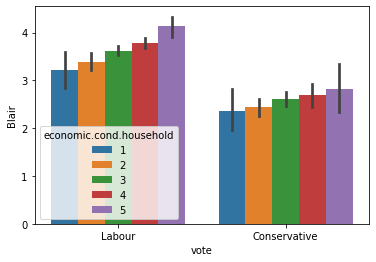

In [242]:
print(sns.barplot(y=df['Blair'], x=df['vote'], hue= df['economic.cond.household'],data=df))

3. **From this Barplot between the economic condition of household and the political party the voter belive that Labour party has a better approach to better household and national economic condition.**
4. **Also more supporters believe that the Labour party leader have better assements on economic condition of the country as more people rated him with 4 and 5 stars.**

AxesSubplot(0.125,0.125;0.775x0.755)


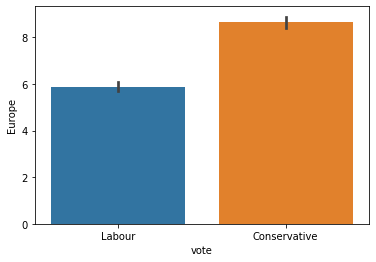

In [246]:
print(sns.barplot(y=df['Europe'], x=df['vote'],data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


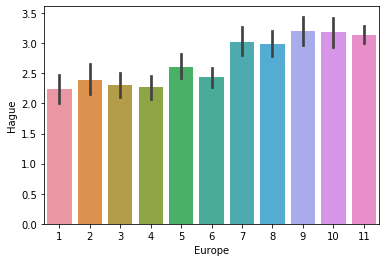

In [247]:
print(sns.barplot(x=df['Europe'], y=df['Hague'],data=df))

5. **This barplot shows that the conservative party and its leader Hague has a better assements in terms of European integration and European sentiment while comparing to conservative party.**


# Problem 2:

# In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

# President Franklin D. Roosevelt in 1941
# President John F. Kennedy in 1961
# President Richard Nixon in 1973
# Find the number of characters, words and sentences for the mentioned documents. – 3 Marks
# (Hint: use .words(), .raw(), .sent() for extracting counts)

# Remove all the stopwords from all the three speeches. – 3 Marks
# Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks
# Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]
# Code Snippet to extract the three speeches:

# "
# import nltk
# nltk.download('inaugural')
# from nltk.corpus import inaugural
# inaugural.fileids()
# inaugural.raw('1941-Roosevelt.txt')
# inaugural.raw('1961-Kennedy.txt')
# inaugural.raw('1973-Nixon.txt')
# "

In [194]:
import re
import string 
import nltk
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [195]:
nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.corpus import stopwords
inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# Find the number of characters, words and sentences for the mentioned documents. – 3 Marks

In [196]:
file1=inaugural.words('1941-Roosevelt.txt')
file2=inaugural.words('1961-Kennedy.txt')
file3=inaugural.words('1973-Nixon.txt')

## Number of characters, Words and Sentences in President Franklin D. Roosevelt inagural speech in 1941

In [197]:
print(inaugural.raw('1941-Roosevelt.txt'))

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [198]:
print('Number of characters in President Roosevelts speech is',len(inaugural.raw('1941-Roosevelt.txt')))
print('\n')
print((inaugural.words('1941-Roosevelt.txt')[0:50]))
print('\n')
print('Number of Words in President Roosevelts speech is', len(inaugural.words('1941-Roosevelt.txt')))
print('\n')
print(inaugural.sents('1941-Roosevelt.txt'))
print('\n')
print('Number of Sentences in President Roosevelts speech is',len(inaugural.sents('1941-Roosevelt.txt')))

Number of characters in President Roosevelts speech is 7571


['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'", 's', 'day', 'the', 'task', 'of', 'the']


Number of Words in President Roosevelts speech is 1536


[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]


Number of Sentences in President Roosevelts speech is 68


## Number of characters, Words and Sentences in President John F. Kennedy's inagural speech in 1961.

In [199]:
print(inaugural.raw('1961-Kennedy.txt'))

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [200]:
print('Number of characters in President Kennedy speech is',len(inaugural.raw('1961-Kennedy.txt')))
print('\n')
print((inaugural.words('1961-Kennedy.txt')[0:50]))
print('\n')
print('Number of Words in President Kennedy speech is', len(inaugural.words('1961-Kennedy.txt')))
print('\n')
print(inaugural.sents('1961-Kennedy.txt'))
print('\n')
print('Number of Sentences in President Kennedy speech is',len(inaugural.sents('1961-Kennedy.txt')))

Number of characters in President Kennedy speech is 7618


['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well']


Number of Words in President Kennedy speech is 1546


[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal

## Number of characters, Words and Sentences in President Richard Nixon's inagural speech in 1973.

In [201]:
print(inaugural.raw('1973-Nixon.txt'))

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

In [202]:
print('Number of characters in President Richard Nixon speech is',len(inaugural.raw('1973-Nixon.txt')))
print('\n')
print((inaugural.words('1973-Nixon.txt')[0:50]))
print('\n')
print('Number of Words in President Richard Nixon speech is', len(inaugural.words('1973-Nixon.txt')))
print('\n')
print(inaugural.sents('1973-Nixon.txt'))
print('\n')
print('Number of Sentences in President Richard Nixon speech is',len(inaugural.sents('1973-Nixon.txt')))

Number of characters in President Richard Nixon speech is 9991


['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed']


Number of Words in President Richard Nixon speech is 2028


[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'de

# Remove all the stopwords from all the three speeches.

In [203]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [204]:
from wordcloud import WordCloud,STOPWORDS

In [205]:
stopwords = set(stopwords.words('english') +list(string.punctuation))

## Removing all the stopword in President Franklin D. Roosevelt inagural speech in 1941

In [206]:
words = ' '.join(file1)

In [207]:
all_words1 = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean1 = [word for word in words.split() if word not in stopwords and word not in list(string.punctuation) and  word != '--' and word !='.' and word !=','and word !='It' and word !='its']

In [208]:
all_words_clean1

['On',
 'national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'United',
 'States',
 'In',
 'Washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'In',
 'Lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'Nation',
 'disruption',
 'within',
 'In',
 'day',
 'task',
 'people',
 'save',
 'Nation',
 'institutions',
 'disruption',
 'without',
 'To',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'If',
 'risk',
 'real',
 'peril',
 'inaction',
 'Lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'The',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'The',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'There',
 'men',
 'doubt',
 'There',
 'men',
 'believe',
 'democracy',
 'form',
 'Government',
 'frame',
 'life',
 'l

## Removing all the stopword in President John F. Kennedy's inagural speech in 1961.

In [209]:
all_words2 = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean2 = [word for word in file2 if word not in stopwords and word != '--' and word !='."' and word !='it' and word !='It' and word !='its']

In [210]:
all_words_clean2

['Vice',
 'President',
 'Johnson',
 'Mr',
 'Speaker',
 'Mr',
 'Chief',
 'Justice',
 'President',
 'Eisenhower',
 'Vice',
 'President',
 'Nixon',
 'President',
 'Truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'For',
 'I',
 'sworn',
 'I',
 'Almighty',
 'God',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'The',
 'world',
 'different',
 'For',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'And',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'God',
 'We',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'Let',
 'word',
 'go',
 'for

## Removing all the stopword in President Richard Nixon's inagural speech in 1973.

In [211]:
all_words3 = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean3 = [word for word in file3 if word not in stopwords and word != '--' and word !='."' and word !='it'and word !='It' and word !='its']

In [212]:
all_words_clean3

['Mr',
 'Vice',
 'President',
 'Mr',
 'Speaker',
 'Mr',
 'Chief',
 'Justice',
 'Senator',
 'Cook',
 'Mrs',
 'Eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'When',
 'met',
 'four',
 'years',
 'ago',
 'America',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'As',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'The',
 'central',
 'question',
 'us',
 'How',
 'shall',
 'use',
 'peace',
 'Let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'Let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'America',
 'enter',
 'third',
 'century',
 'nation',
 'This',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new

# Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.

## The word occurs the most number of times in President Franklin D. Roosevelt inagural speech in 1941

In [213]:

most1=nltk.FreqDist(all_words_clean1)
print('The word occurs the most number of times in President Franklin D. Roosevelt inagural speech:',most1.most_common(1))

most_word1 = [item[0] for item in most1.most_common(3)]
print('\n Top three most occcured words are ',most_word1)

The word occurs the most number of times in President Franklin D. Roosevelt inagural speech: [('The', 10)]

 Top three most occcured words are  ['The', 'know', 'We']


## The word occurs the most number of times in President John F. Kennedy's inagural speech in 1961.

In [214]:
most2=nltk.FreqDist(all_words_clean2)
print('The word occurs the most number of times in President John F. Kennedy inagural speech:',most2.most_common(1))
most_word2 = [item[0] for item in most2.most_common(3)]
print('\n Top three most occcured words are ',most_word2)

The word occurs the most number of times in President John F. Kennedy inagural speech: [('us', 12)]

 Top three most occcured words are  ['us', 'world', 'Let']


## The word occurs the most number of times in President Richard Nixon's inagural speech in 1973.

In [215]:
most3=nltk.FreqDist(all_words_clean3)
print('The word occurs the most number of times in President Richard Nixon inagural speech',most3.most_common(1))
most_word3 = [item[0] for item in most3.most_common(3)]
print('\n Top three most occcured words are ',most_word3)

The word occurs the most number of times in President Richard Nixon inagural speech [('us', 26)]

 Top three most occcured words are  ['us', 'America', 'peace']


## Word cloud for President Franklin D. Roosevelt inagural speech in 1941

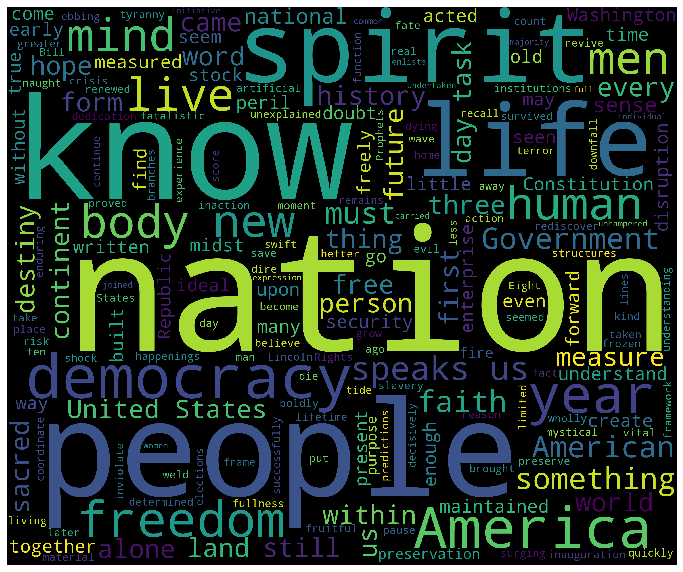

In [216]:

words = ' '.join(file1)
cleaned_word = " ".join([word for word in words.split()
                            if word not in stopwords 
                                and word != '--' and word !='."' 
                                and word !='it' and word !='It' and word !='its'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Word cloud for President John F. Kennedy's inagural speech in 1961.

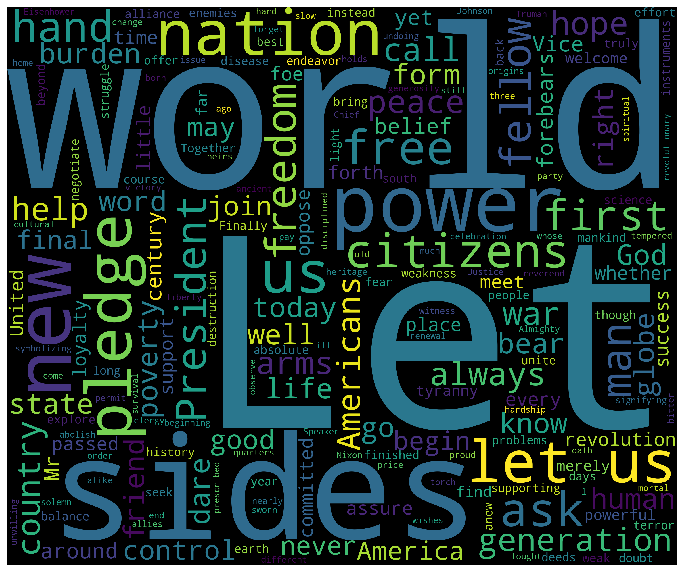

In [217]:

words = ' '.join(file2)
cleaned_word = " ".join([word for word in words.split()
                            if word not in stopwords 
                                and word != '--' and word !='."' 
                                and word !='it' and word !='It' and word !='its'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Word cloud for President Richard Nixon's inagural speech in 1973.

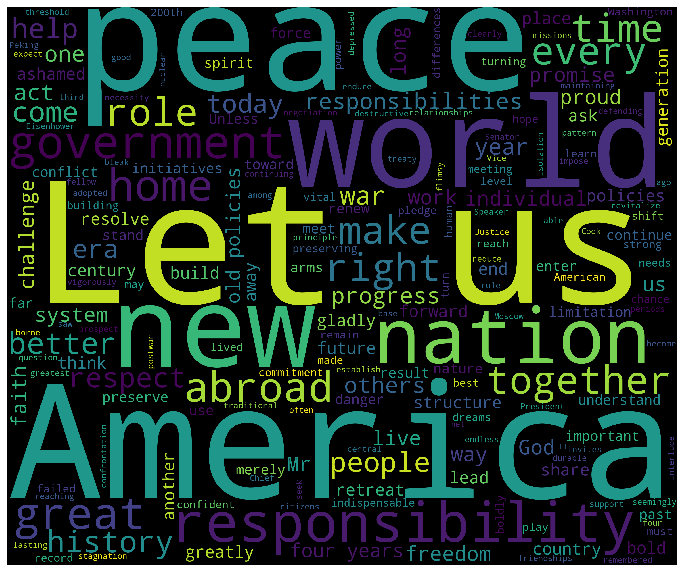

In [218]:

words = ' '.join(file3)
cleaned_word = " ".join([word for word in words.split()
                            if word not in stopwords 
                                and word != '--' and word !='."' 
                                and word !='it' and word !='It' and word !='its'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()